### 경기도 아파트 매매가격 - 아파트거래량 상관관계 분석

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_path = "./data/가공data/경기도_주택가격(아파트중위매매가격)"
df_price_ggu = pd.read_csv(file_path)
df_price_ggu

,Unnamed: 0,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,수원시,223279,218183,232548,254323,267236,275195,296356,311484,396809,499071
1,성남시,484754,452339,459503,487148,510663,533477,644188,736353,883722,1008313
2,의정부시,197583,188750,187916,194583,201750,206166,231958,232333,240875,330000
3,안양시,308162,289657,297884,324310,339863,351472,402311,444364,507285,622496
4,부천시,240015,229261,240441,251803,262430,266541,293958,314625,336500,446958
5,광명시,295125,286125,300875,346000,373875,379458,399750,475916,585666,701333
6,평택시,155666,158916,172125,178458,182833,188541,176500,175750,178583,229833
7,동두천시,134625,122583,124500,124833,127541,132250,143666,139541,137083,188291
8,안산시,229958,223637,231115,252408,264743,268677,271497,248243,272931,388925
9,고양시,262284,245070,255616,269753,282028,291520,316249,332344,367903,497836


In [4]:
df_price_ggu = df_price_ggu.rename(columns={"Unnamed: 0" : "경기도시"})
df_price_ggu

,경기도시,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,수원시,223279,218183,232548,254323,267236,275195,296356,311484,396809,499071
1,성남시,484754,452339,459503,487148,510663,533477,644188,736353,883722,1008313
2,의정부시,197583,188750,187916,194583,201750,206166,231958,232333,240875,330000
3,안양시,308162,289657,297884,324310,339863,351472,402311,444364,507285,622496
4,부천시,240015,229261,240441,251803,262430,266541,293958,314625,336500,446958
5,광명시,295125,286125,300875,346000,373875,379458,399750,475916,585666,701333
6,평택시,155666,158916,172125,178458,182833,188541,176500,175750,178583,229833
7,동두천시,134625,122583,124500,124833,127541,132250,143666,139541,137083,188291
8,안산시,229958,223637,231115,252408,264743,268677,271497,248243,272931,388925
9,고양시,262284,245070,255616,269753,282028,291520,316249,332344,367903,497836


In [5]:
file_path2 = "./data/가공data/서울_주택가격(아파트중위매매가격)"
df_price_seoul = pd.read_csv(file_path2)
df_price_seoul

,Unnamed: 0,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,서울,475973,451921,457744,489772,516892,543780,668223,780026,846466,919111
1,종로구,435000,434416,395166,401750,412541,431833,576875,688041,860375,947958
2,중구,485943,467500,463583,485583,506250,527166,660416,775666,817250,991708
3,용산구,771000,710416,666875,677125,689208,727791,969291,1321250,1299583,1471666
4,성동구,462541,435791,449333,467875,485958,509416,661791,842541,887083,1116583
5,광진구,545333,513041,512166,536500,565791,597708,738291,861041,992666,1158916
6,동대문구,351708,334833,341333,355291,378666,399416,460833,582916,631708,756458
7,중랑구,299583,291833,286750,296000,305416,311625,350416,482958,482125,576791
8,성북구,365375,352750,363250,374750,393208,409250,465375,540625,594750,726916
9,강북구,337083,320416,323000,332458,345291,349750,389791,453708,469625,603500


In [6]:
df_price_seoul = df_price_seoul.rename(columns={"Unnamed: 0" : "서울구"})
df_price_seoul

,서울구,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,서울,475973,451921,457744,489772,516892,543780,668223,780026,846466,919111
1,종로구,435000,434416,395166,401750,412541,431833,576875,688041,860375,947958
2,중구,485943,467500,463583,485583,506250,527166,660416,775666,817250,991708
3,용산구,771000,710416,666875,677125,689208,727791,969291,1321250,1299583,1471666
4,성동구,462541,435791,449333,467875,485958,509416,661791,842541,887083,1116583
5,광진구,545333,513041,512166,536500,565791,597708,738291,861041,992666,1158916
6,동대문구,351708,334833,341333,355291,378666,399416,460833,582916,631708,756458
7,중랑구,299583,291833,286750,296000,305416,311625,350416,482958,482125,576791
8,성북구,365375,352750,363250,374750,393208,409250,465375,540625,594750,726916
9,강북구,337083,320416,323000,332458,345291,349750,389791,453708,469625,603500


In [7]:
df_price_ggu_18192021 = df_price_ggu[["경기도시","2018년", "2019년", "2020년", "2021년"]].sort_values("2021년",ascending=False).reset_index(drop=True)
df_price_seoul_18192021 = df_price_seoul[["서울구", "2018년", "2019년", "2020년", "2021년"]].sort_values("2021년",ascending=False).reset_index(drop=True)

In [8]:
df_price_ggu_18192021_T = df_price_ggu_18192021.T

In [9]:
df_price_seoul_18192021_T = df_price_seoul_18192021.T

In [10]:
df_price_seoul_18192021_T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
서울구,강남구,서초구,용산구,송파구,광진구,성동구,마포구,양천구,동작구,중구,...,은평구,성북구,강서구,관악구,구로구,강북구,중랑구,노원구,금천구,도봉구
2018년,1361666,1254791,969291,1086666,738291,661791,712708,646958,673416,660416,...,437083,465375,510833,456000,416541,389791,350416,350583,361708,337875
2019년,1530833,1421458,1321250,1121041,861041,842541,846208,761458,780166,775666,...,537875,540625,575958,531083,500166,453708,482958,415250,401291,401291
2020년,1638541,1637708,1299583,1260208,992666,887083,982083,831500,822875,817250,...,623958,594750,610041,552416,522875,469625,482125,450083,475416,400375
2021년,1955958,1843166,1471666,1456375,1158916,1116583,1098625,1044416,993125,991708,...,754791,726916,719416,668416,607125,603500,576791,573958,563416,530750


In [11]:
df_ggu_seoul_2021 = pd.concat([df_price_seoul_18192021_T, df_price_ggu_18192021_T])
df_ggu_seoul = df_ggu_seoul_2021.T
df_ggu_seoul

,서울구,2018년,2019년,2020년,2021년,경기도시,2018년,2019년,2020년,2021년
0,강남구,1361666,1530833,1638541,1955958,과천시,862291,1112500,1258958,1495583
1,서초구,1254791,1421458,1637708,1843166,성남시,644188,736353,883722,1008313
2,용산구,969291,1321250,1299583,1471666,하남시,438250,545416,709583,879166
3,송파구,1086666,1121041,1260208,1456375,광명시,399750,475916,585666,701333
4,광진구,738291,861041,992666,1158916,구리시,379583,418458,528083,642291
5,성동구,661791,842541,887083,1116583,안양시,402311,444364,507285,622496
6,마포구,712708,846208,982083,1098625,의왕시,380166,383791,440541,611884
7,양천구,646958,761458,831500,1044416,용인시,360387,383517,428304,587185
8,동작구,673416,780166,822875,993125,화성시,264083,272916,357666,505458
9,중구,660416,775666,817250,991708,수원시,296356,311484,396809,499071


In [12]:
df_ggu_seoul_2021 = df_ggu_seoul["2021년"].head(20)
df_ggu_seoul_2020 = df_ggu_seoul["2020년"].head(20)
df_ggu_seoul_2019 = df_ggu_seoul["2019년"].head(20)

In [13]:
df_ggu_seoul_2021.columns = ["2021년 서울아파트가격", "2021년 경기도아파트가격"]
df_ggu_seoul_2021

,2021년 서울아파트가격,2021년 경기도아파트가격
0,1955958,1495583
1,1843166,1008313
2,1471666,879166
3,1456375,701333
4,1158916,642291
5,1116583,622496
6,1098625,611884
7,1044416,587185
8,993125,505458
9,991708,499071


In [14]:
df_ggu_seoul_2021 = df_ggu_seoul_2021.astype(int)

In [15]:
df_ggu_seoul_2021_des = df_ggu_seoul_2021.sort_values("2021년 서울아파트가격").reset_index(drop=True)

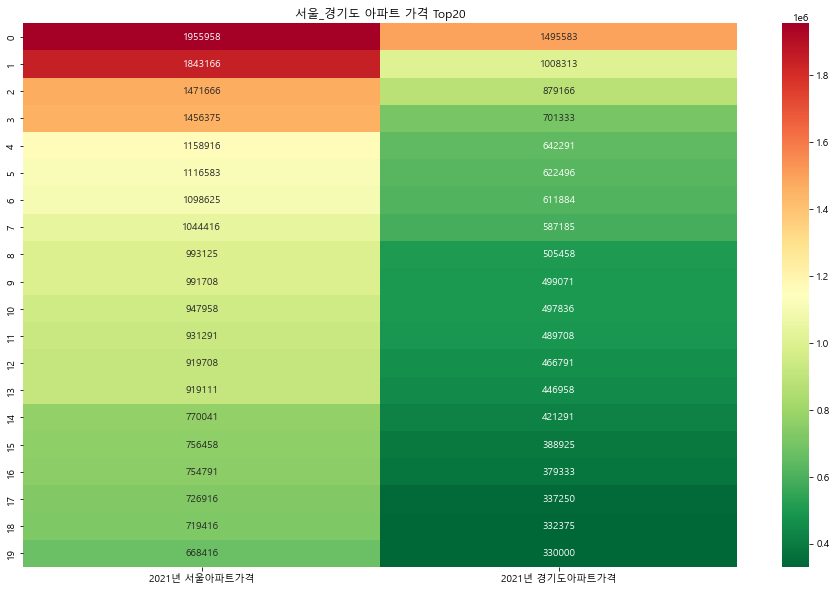

In [16]:
plt.figure(figsize = (16,10))
sns.heatmap(df_ggu_seoul_2021, annot=True, fmt = '.0f', cmap='RdYlGn_r')
plt.title('서울_경기도 아파트 가격 Top20')
plt.show()

In [18]:
df_ggu_seoul_2021.corr()

,2021년 서울아파트가격,2021년 경기도아파트가격
2021년 서울아파트가격,1.000000,0.956433
2021년 경기도아파트가격,0.956433,1.000000
